In [815]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error


In [816]:
data = pd.read_csv("king_ country_ houses_aa.csv")
df = data.copy()

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [817]:
# column standardization
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [818]:
# dealing with data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [819]:
# dealing with NaN values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [820]:
# dealing with duplicates
df.duplicated().sum()

np.int64(0)

In [821]:
# dealing with empty spaces
df.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [822]:
# checking unique values
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [823]:
#df.chas.value_counts()

In [824]:
df['year'] = df['date'].str.slice(0, 4).astype(int)
df['month'] = df['date'].str.slice(4, 6).astype(int)
df['day'] = df['date'].str.slice(6, 8).astype(int)

In [825]:
df['sale_price'] = df['price']
df = df.drop('price', axis=1)

df = df.rename(columns={'sale_price': 'price'})

In [826]:
df = df.drop(['id', 'date'], axis=1)

In [827]:
#df = df.drop(columns = ['date'])

In [828]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,98103,47.6993,-122.346,1530,1509,2014,5,21,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,0,98146,47.5107,-122.362,1830,7200,2015,2,23,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,98144,47.5944,-122.299,1020,2007,2014,6,23,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,0,98027,47.5345,-122.069,1410,1287,2015,1,16,400000.0


In [829]:
# checking outliers
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day             -0.014670
zipcode         -0.053203
dtype: float64

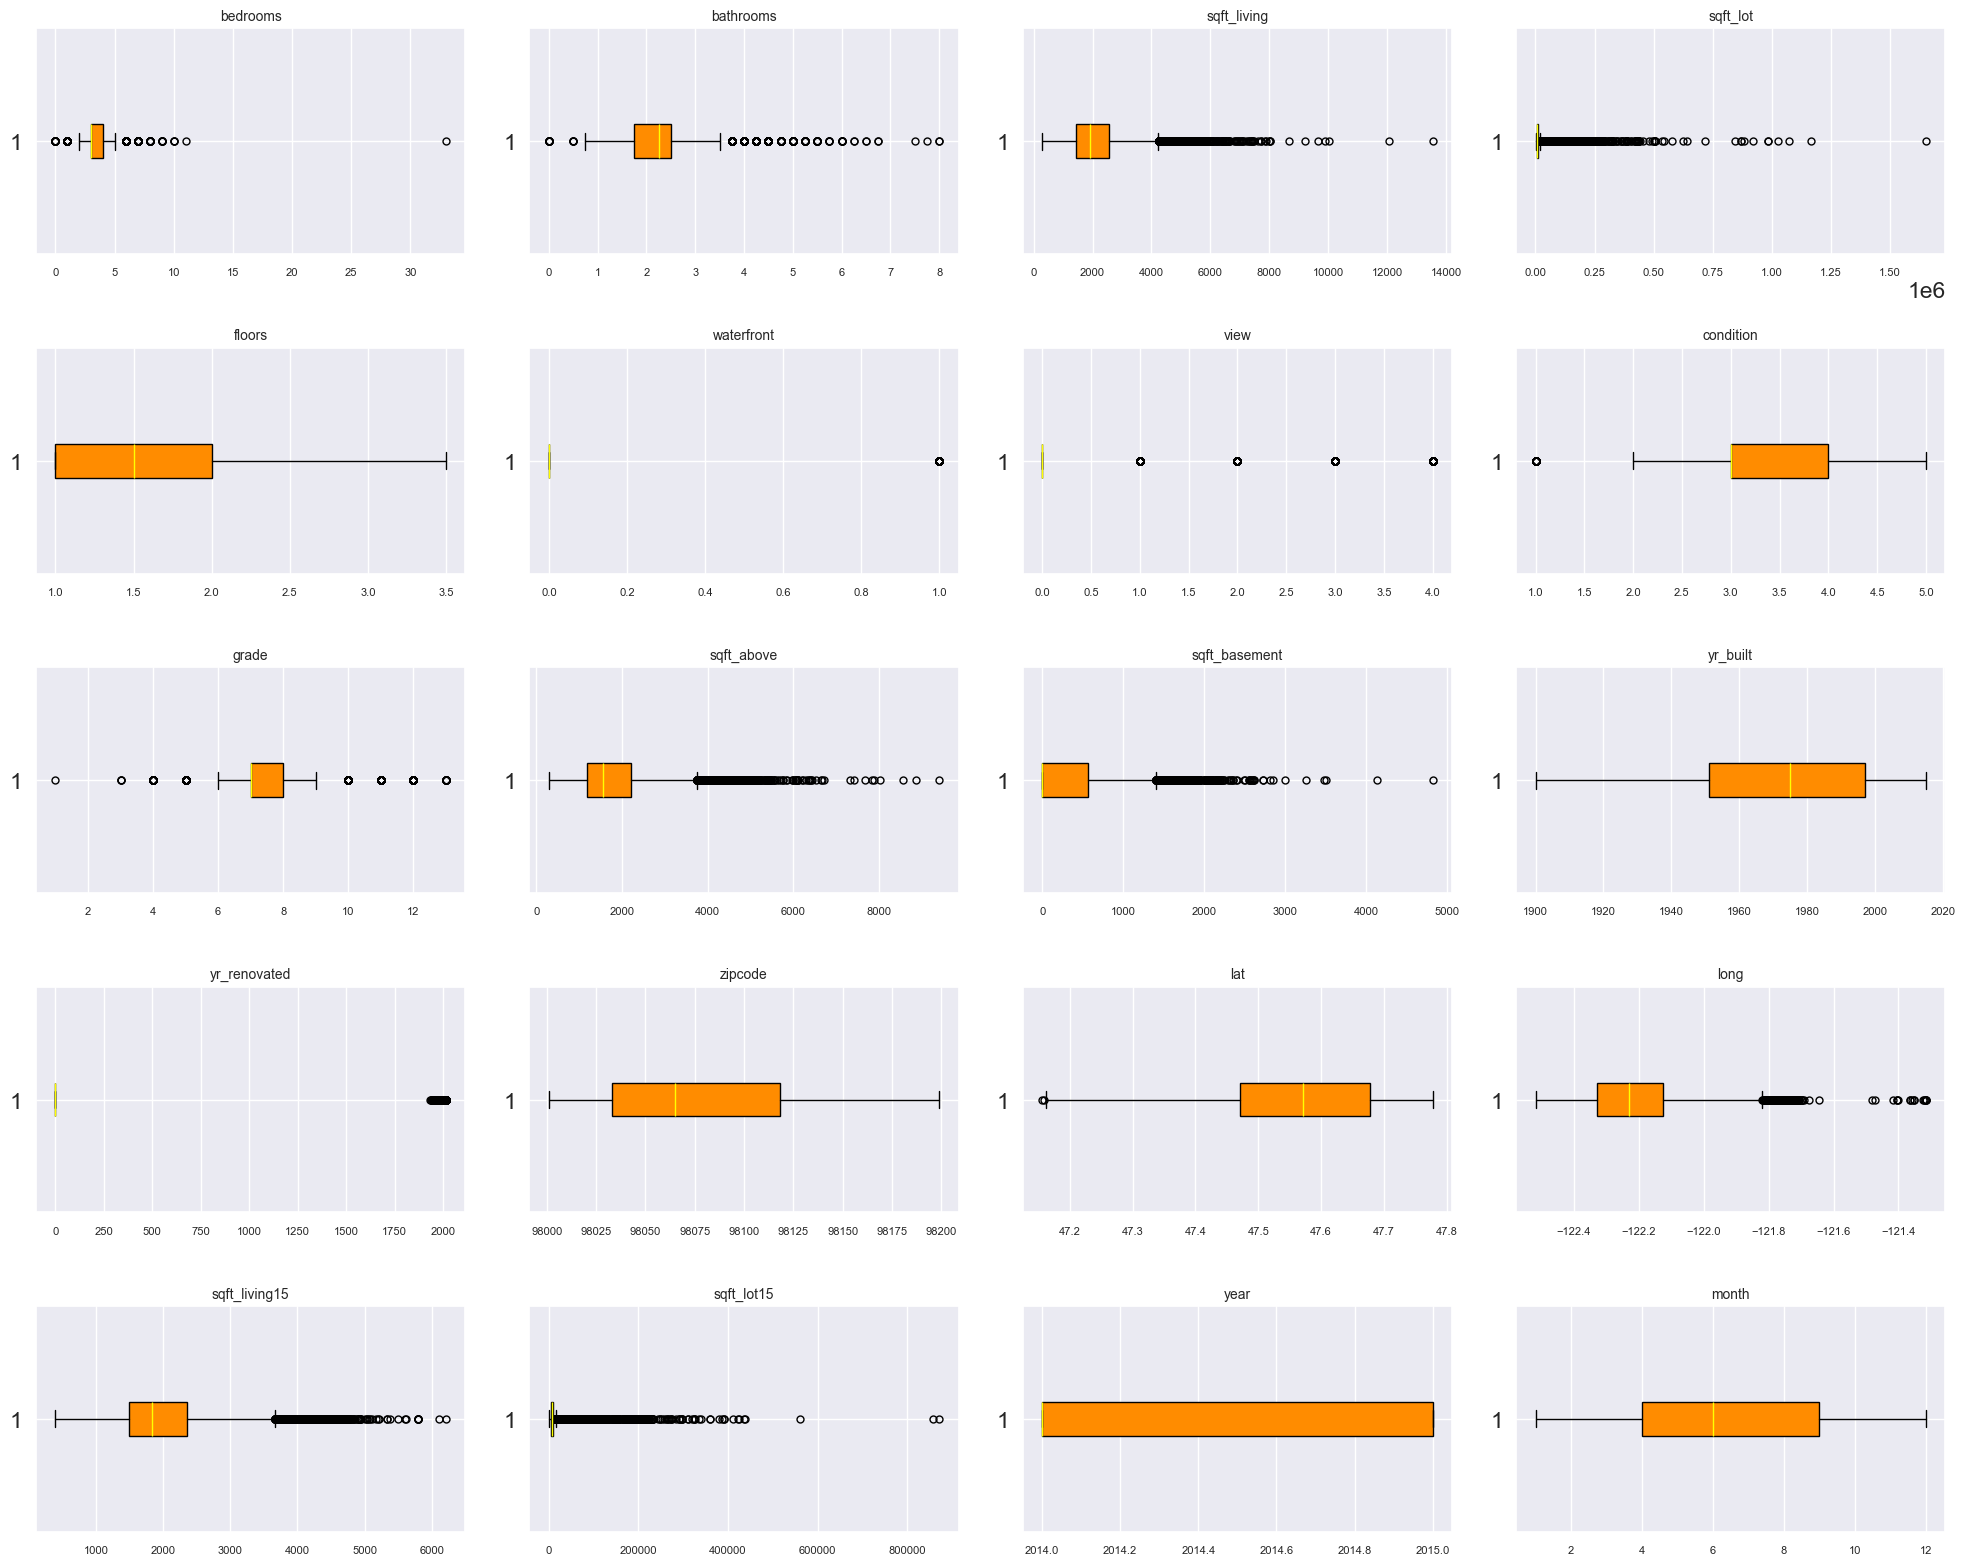

In [830]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

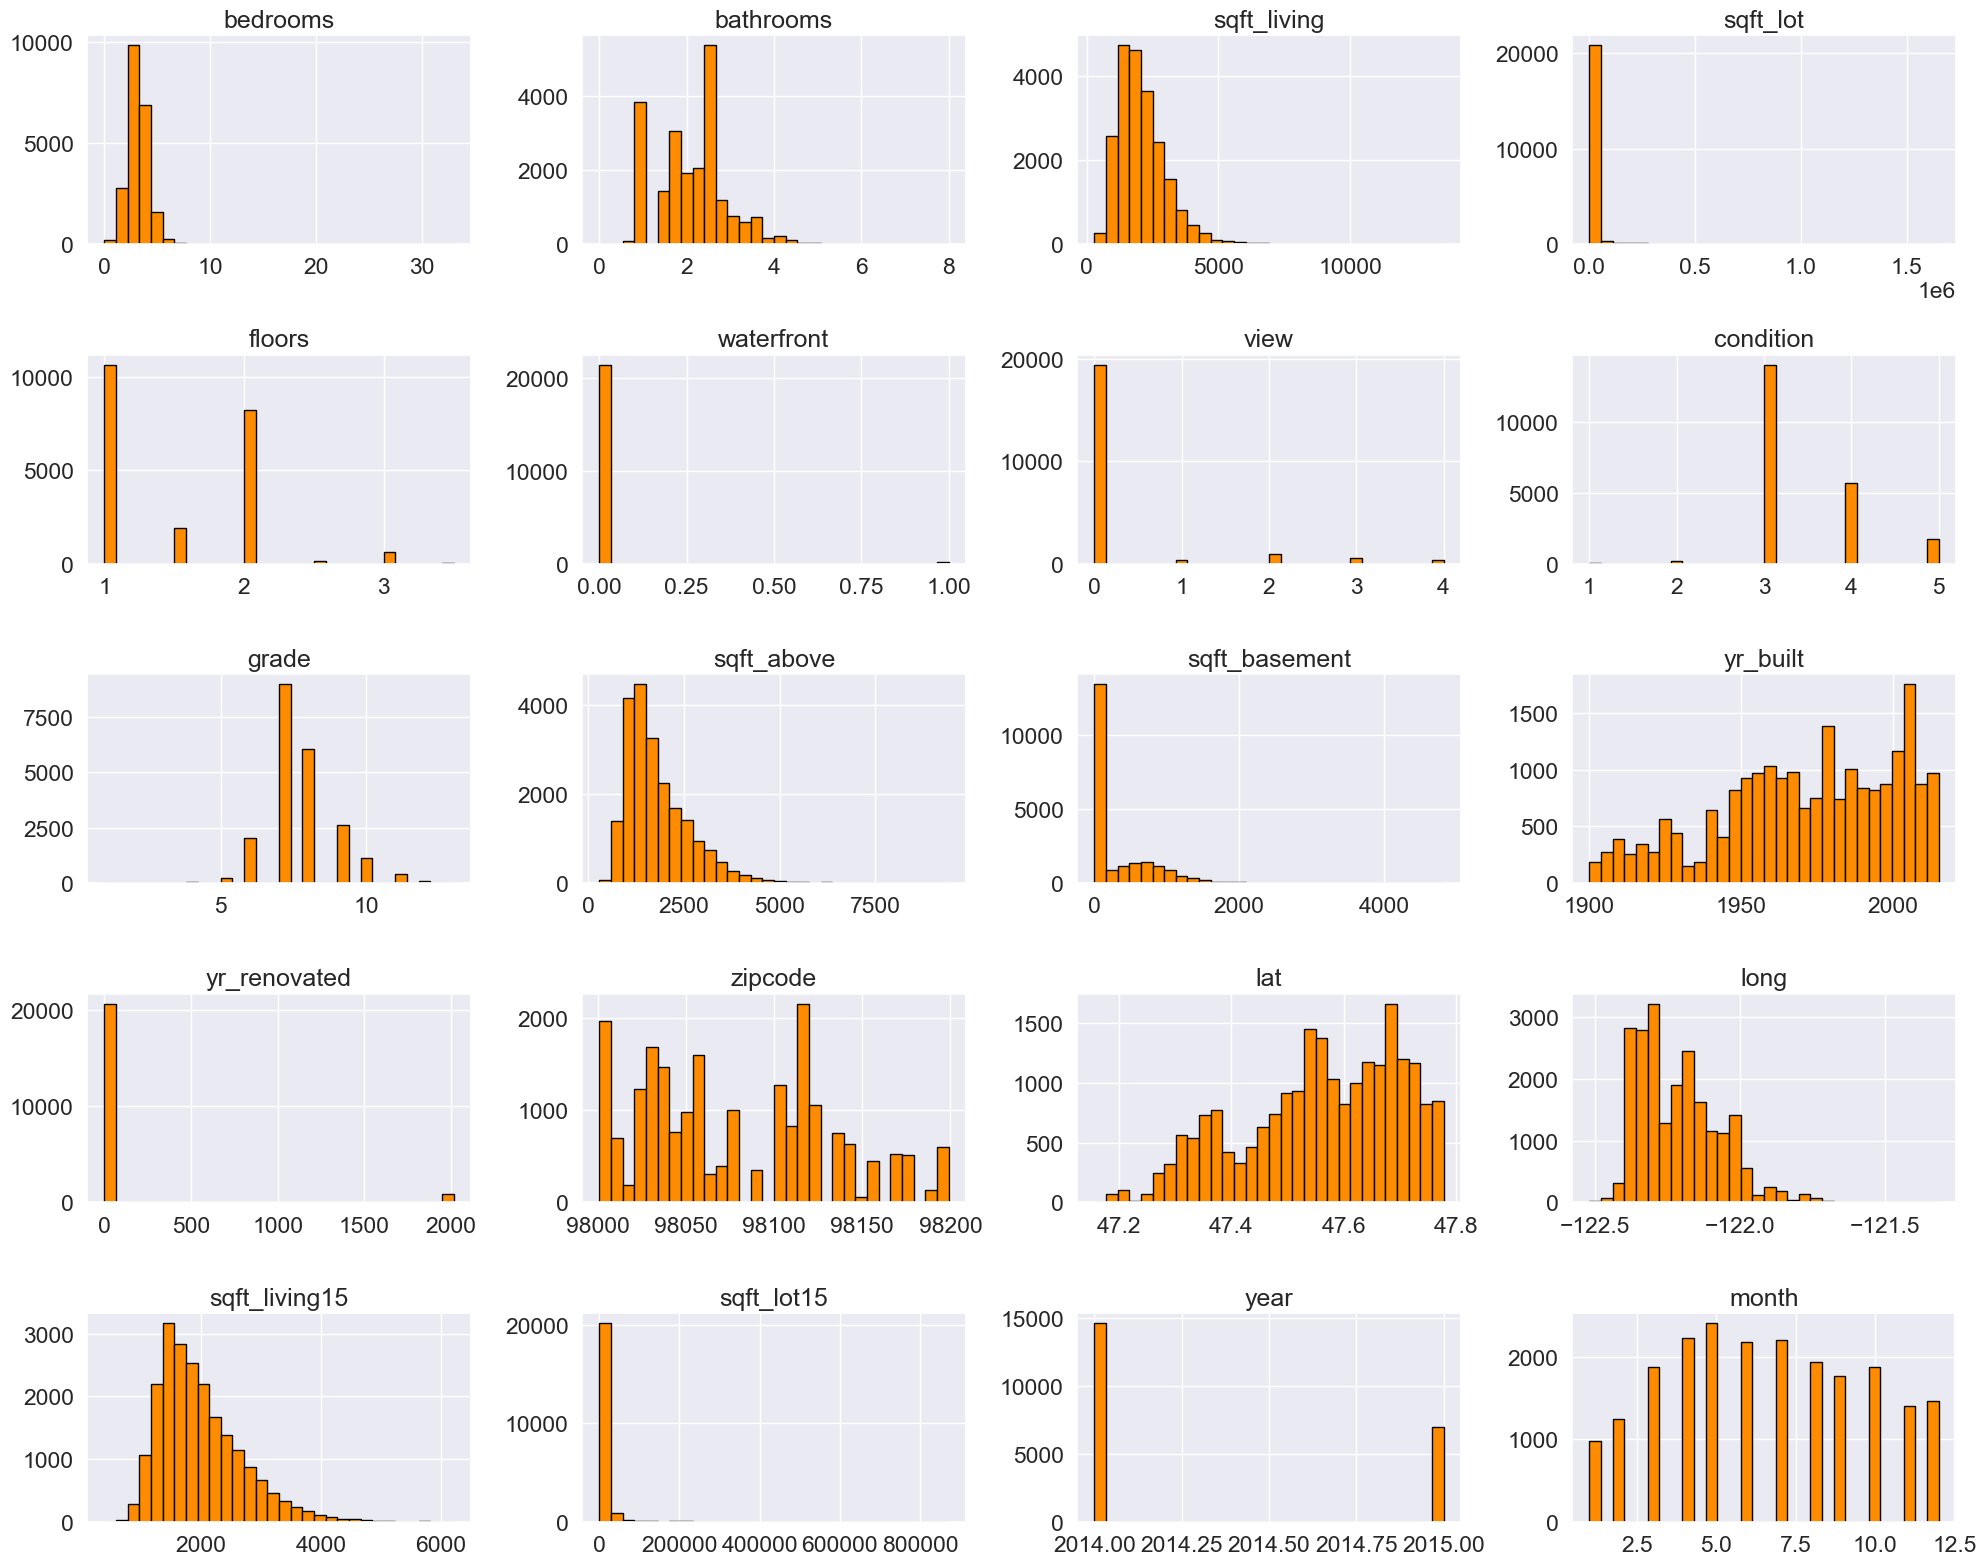

In [831]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [832]:
# looking for correlations with the target
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day             -0.014670
zipcode         -0.053203
dtype: float64

In [833]:
# dealing with multicolinearitiy 
num_corr = round(df.corr(), 2)


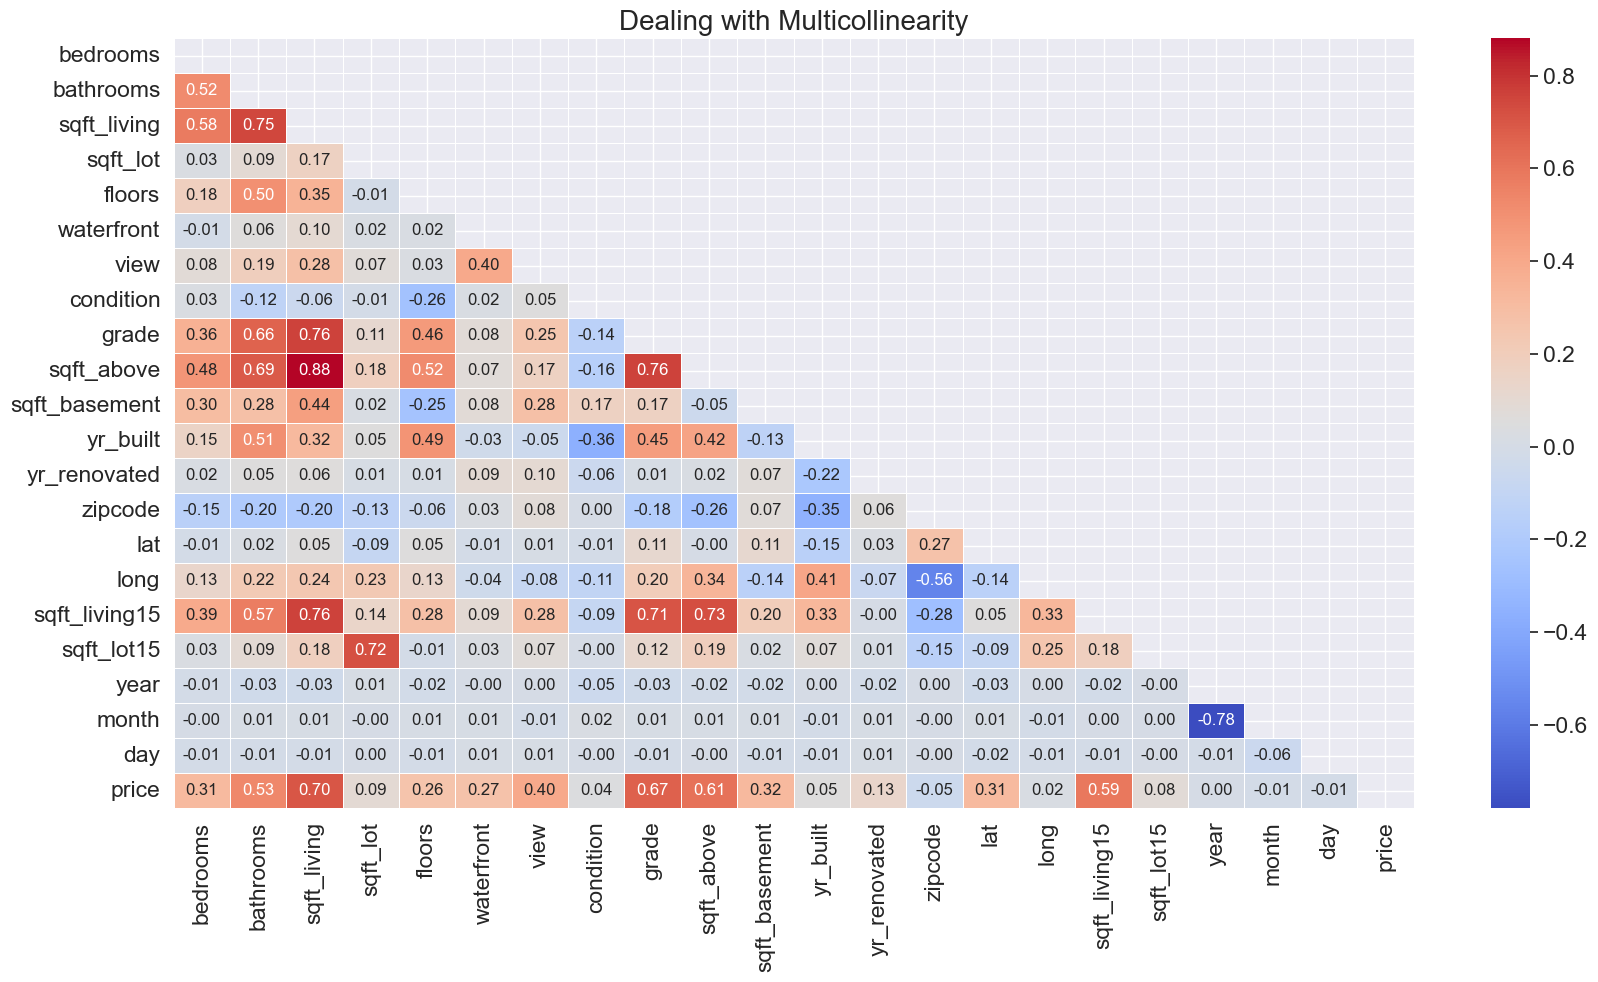

In [834]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [835]:
df = df.drop(columns=["zipcode", "sqft_above", "sqft_living15", "sqft_lot15", "grade", "bathrooms", "bedrooms", "year", "month", "day", ])

In [836]:
# dealing with multicolinearitiy 
num_corr = round(df.corr(), 2)

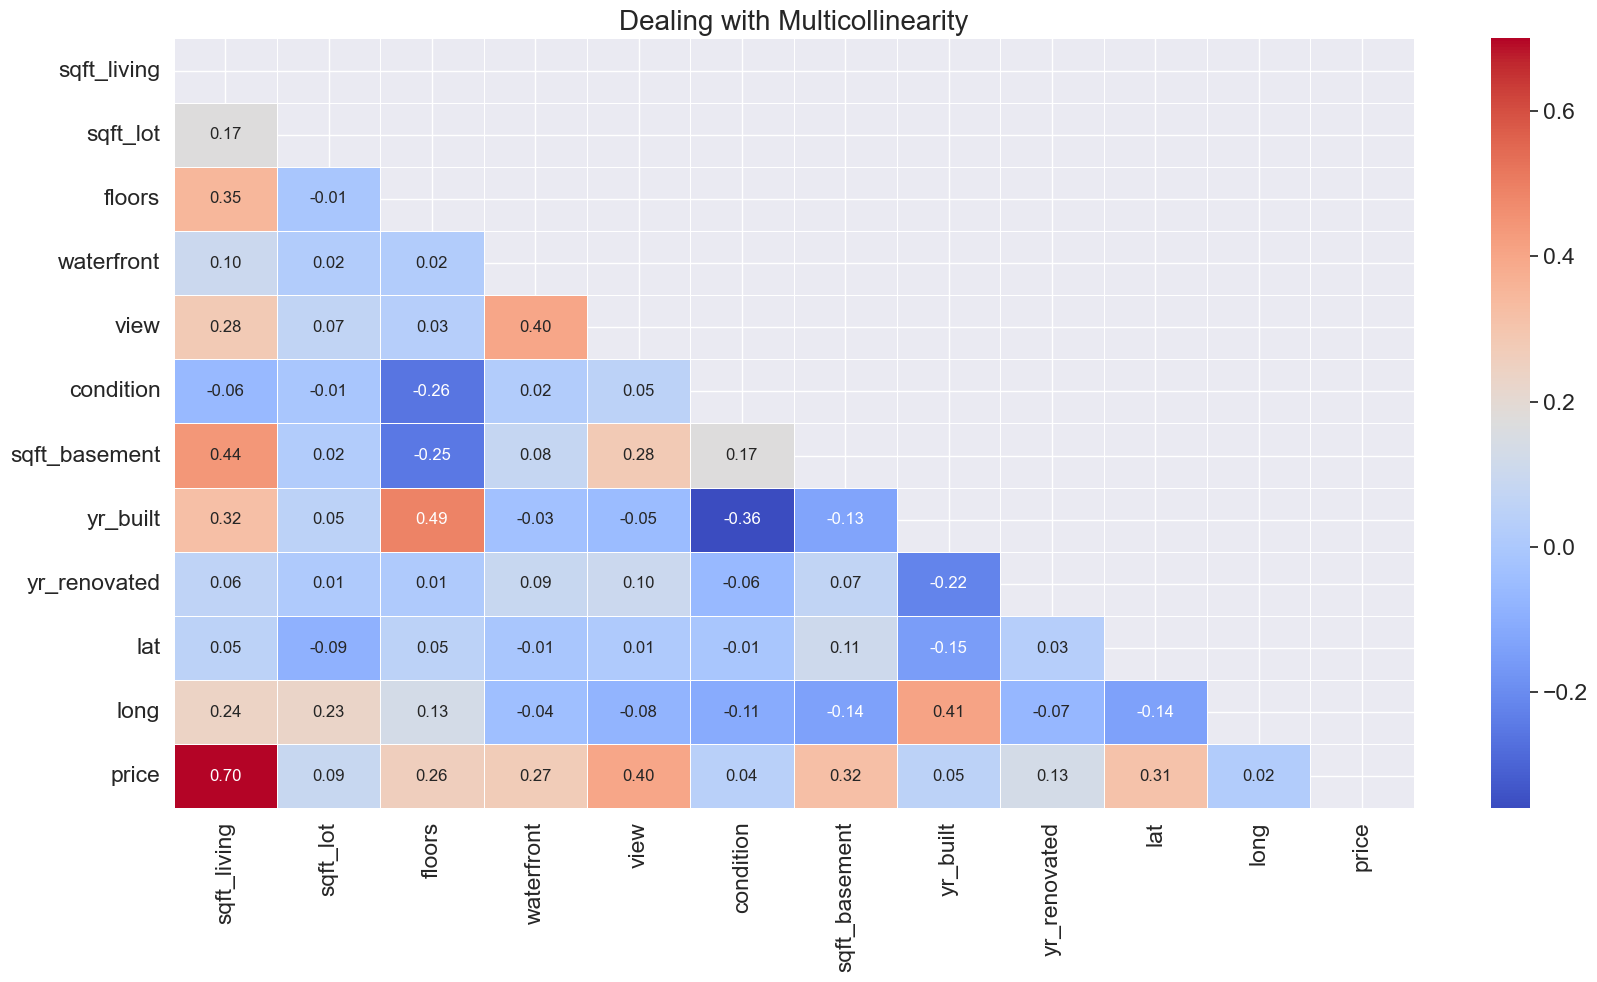

In [837]:
# Correlation Matrix-Heatmap Plot UPDATED
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Modeling

In [838]:
#X-y Split
X = df.drop(columns="price")
y = df.price

In [839]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [840]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


In [841]:
model = LinearRegression()

In [842]:
model


LinearRegression()

In [843]:
model.fit(X_train, y_train)

LinearRegression()

In [844]:
predictions = model.predict(X_test)

In [845]:
# Make a dataframe to compare

eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
735,365000.0,4.547905e+05
2830,865000.0,8.093246e+05
4106,1038000.0,1.118610e+06
16218,1490000.0,1.456757e+06
19964,711000.0,6.796346e+05
...,...,...
12606,412000.0,4.900522e+05
14393,760000.0,5.874977e+05
6899,410500.0,4.044002e+05
85,940000.0,6.635124e+05


In [846]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
735,365000.0,4.547905e+05,89790.457029
2830,865000.0,8.093246e+05,55675.395814
4106,1038000.0,1.118610e+06,80610.230647
16218,1490000.0,1.456757e+06,33242.686191
19964,711000.0,6.796346e+05,31365.428739


In [847]:
# metrics

r2_3 = r2_score(y_test, predictions)
RMSE_3 = root_mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [848]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6452
RMSE =  226317.2524
MAE =  141104.1732


In [849]:
mean = df["price"].mean()

mean

np.float64(540088.1417665294)

### 06 Improving the Model

#### Ridge Regression

In [850]:
from sklearn.linear_model import Ridge

In [851]:
model = Ridge()

In [852]:
model.fit(X_train, y_train)

Ridge()

In [853]:
predictions_ridge = model.predict(X_test)

#### Model Validation

In [854]:
# metrics

r2_3_2 = r2_score(y_test, predictions)
RMSE_3_2 = root_mean_squared_error(y_test, predictions)
MAE_3_2 = mean_absolute_error(y_test, predictions)


In [855]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6452
RMSE =  226317.2524
MAE =  141104.1732


#### Lasso Regression

In [856]:
from sklearn.linear_model import Lasso

In [857]:
model = Lasso()

In [858]:
model.fit(X_train, y_train)

Lasso()

In [859]:
predictions_lasso = model.predict(X_test)

#### Model Validation

In [860]:
# Metrics
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = root_mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [861]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6452
RMSE =  226318.2464
MAE =  141104.1154


### Decision Tree Regression

In [862]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [863]:
predictions_tree = tree.predict(X_test)

In [864]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = root_mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [865]:
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.697
RMSE =  209138.5515
MAE =  107126.9158


#### KNN Regression

In [866]:
from sklearn.neighbors import KNeighborsRegressor

In [867]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [868]:
predictions_knn = knn.predict(X_test)

In [869]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = root_mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [870]:
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.4948
RMSE =  270061.3887
MAE =  169143.5556


### XGBoost 

In [871]:
import xgboost as xgb

In [872]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [873]:
predictions_xgb = xgbr.predict(X_test)

In [874]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = root_mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

### Final Comparison

In [875]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]
}

In [876]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.645212,0.645212,0.645209,0.697029,0.494806,0.775157
RMSE,226317.252442,226317.252442,226318.246365,209138.551486,270061.388652,180166.003823
MAE,141104.173201,141104.173201,141104.115363,107126.915793,169143.555645,103171.998754


### Normalization with MinMaxScaler

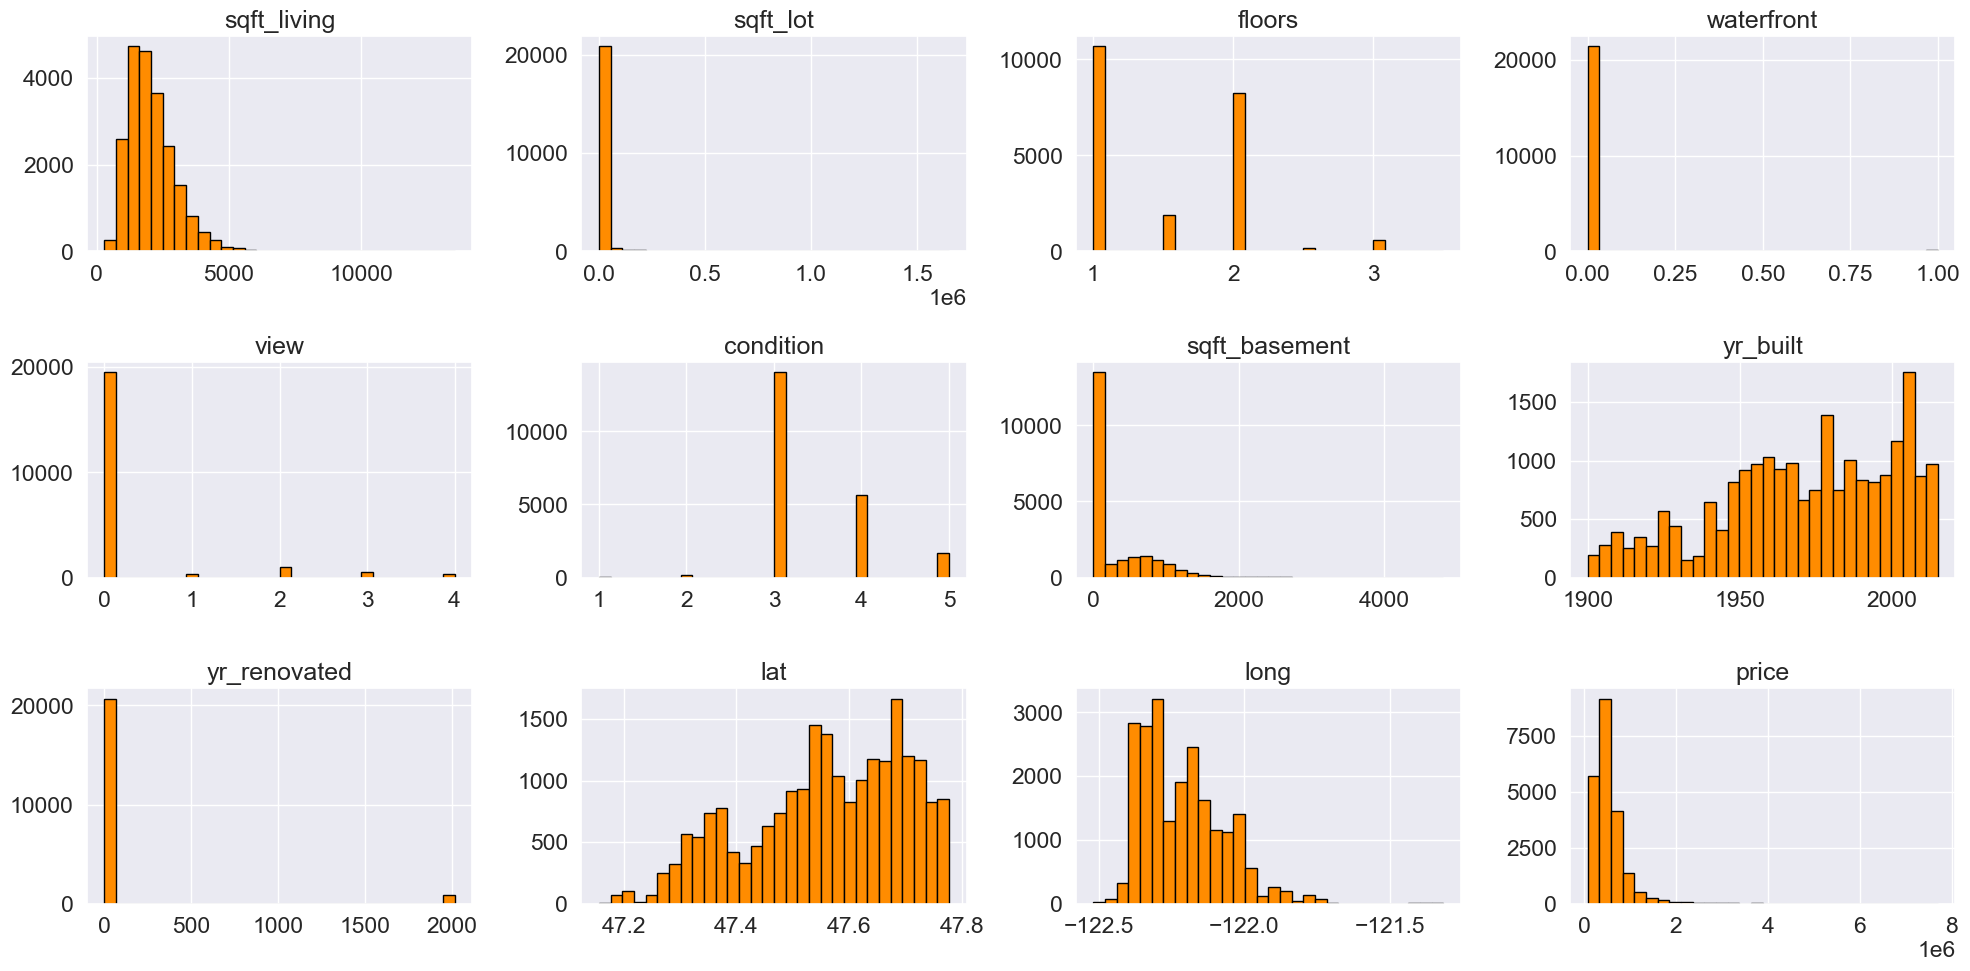

In [ ]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [878]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

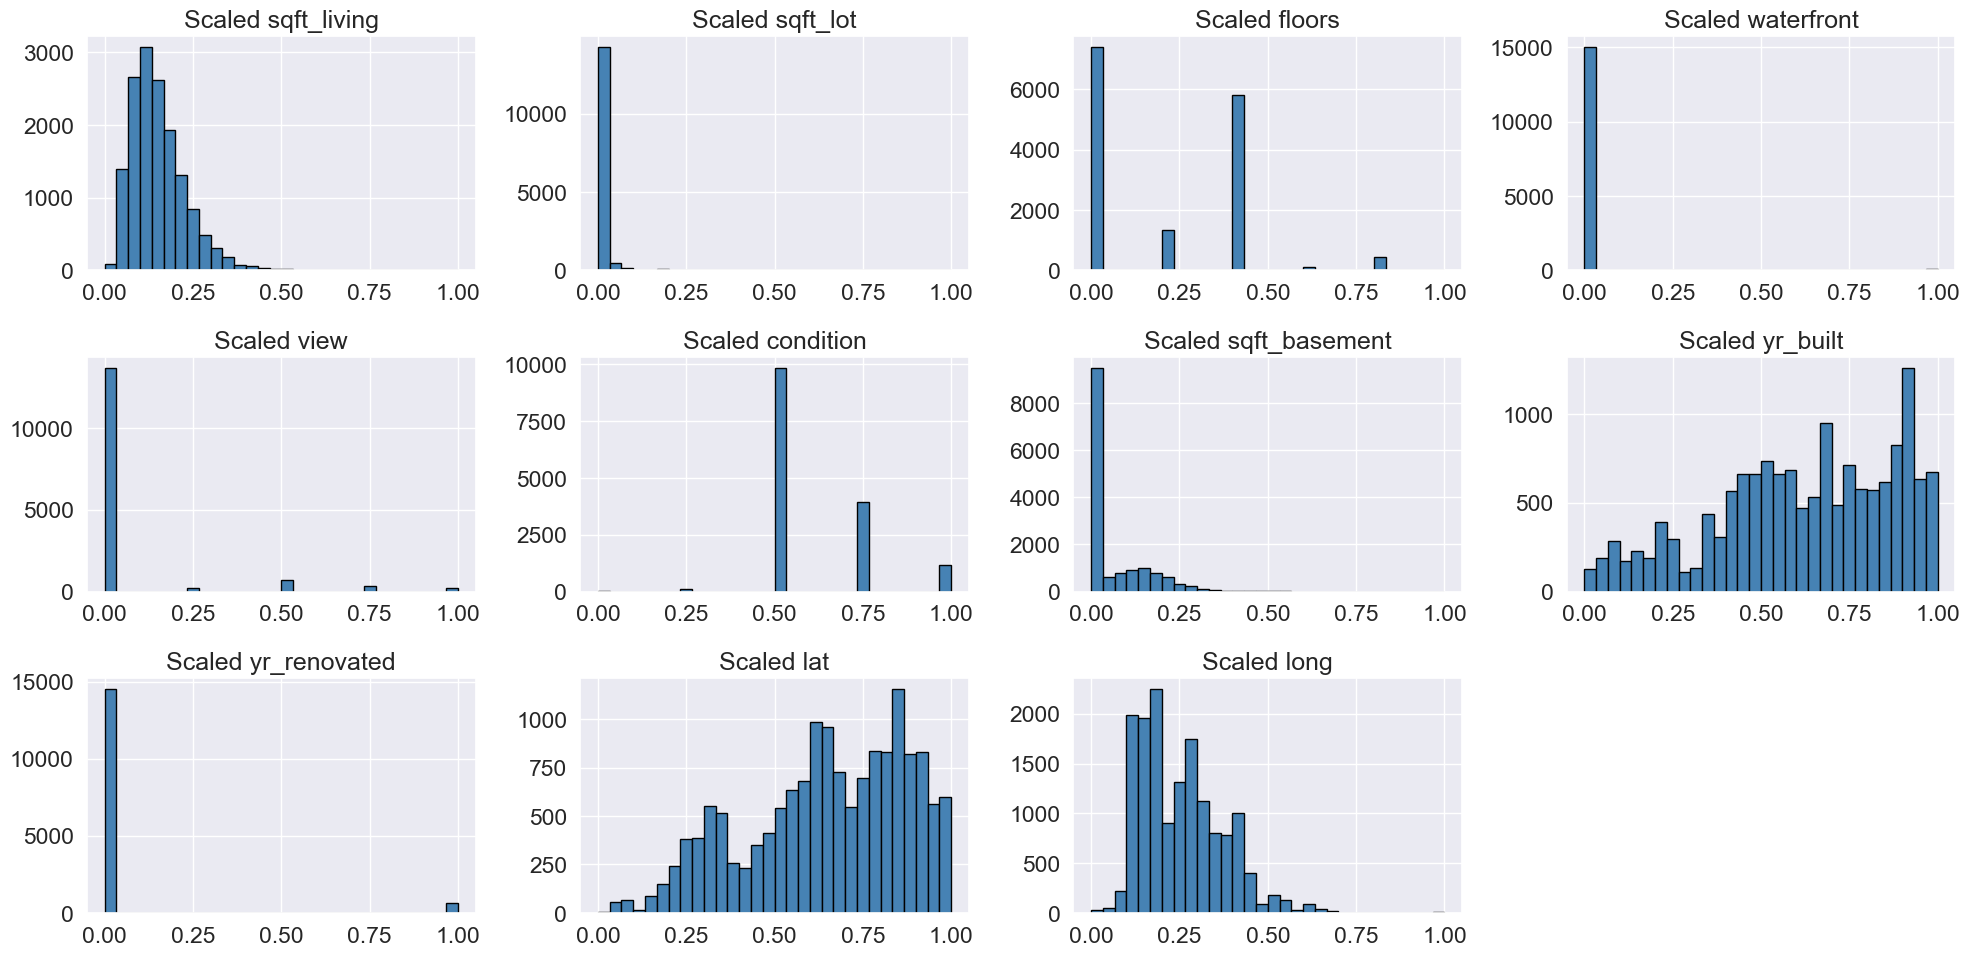

In [879]:
color = '#4682B4'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df.columns[i]}')

plt.tight_layout()
plt.show()

In [880]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [881]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8644
RMSE =  139920.9046
MAE =  74972.5542


### Standardization with StandardScaler

In [882]:
from sklearn.preprocessing import StandardScaler

In [883]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [884]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [885]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8644
RMSE =  139920.9046
MAE =  74972.5542


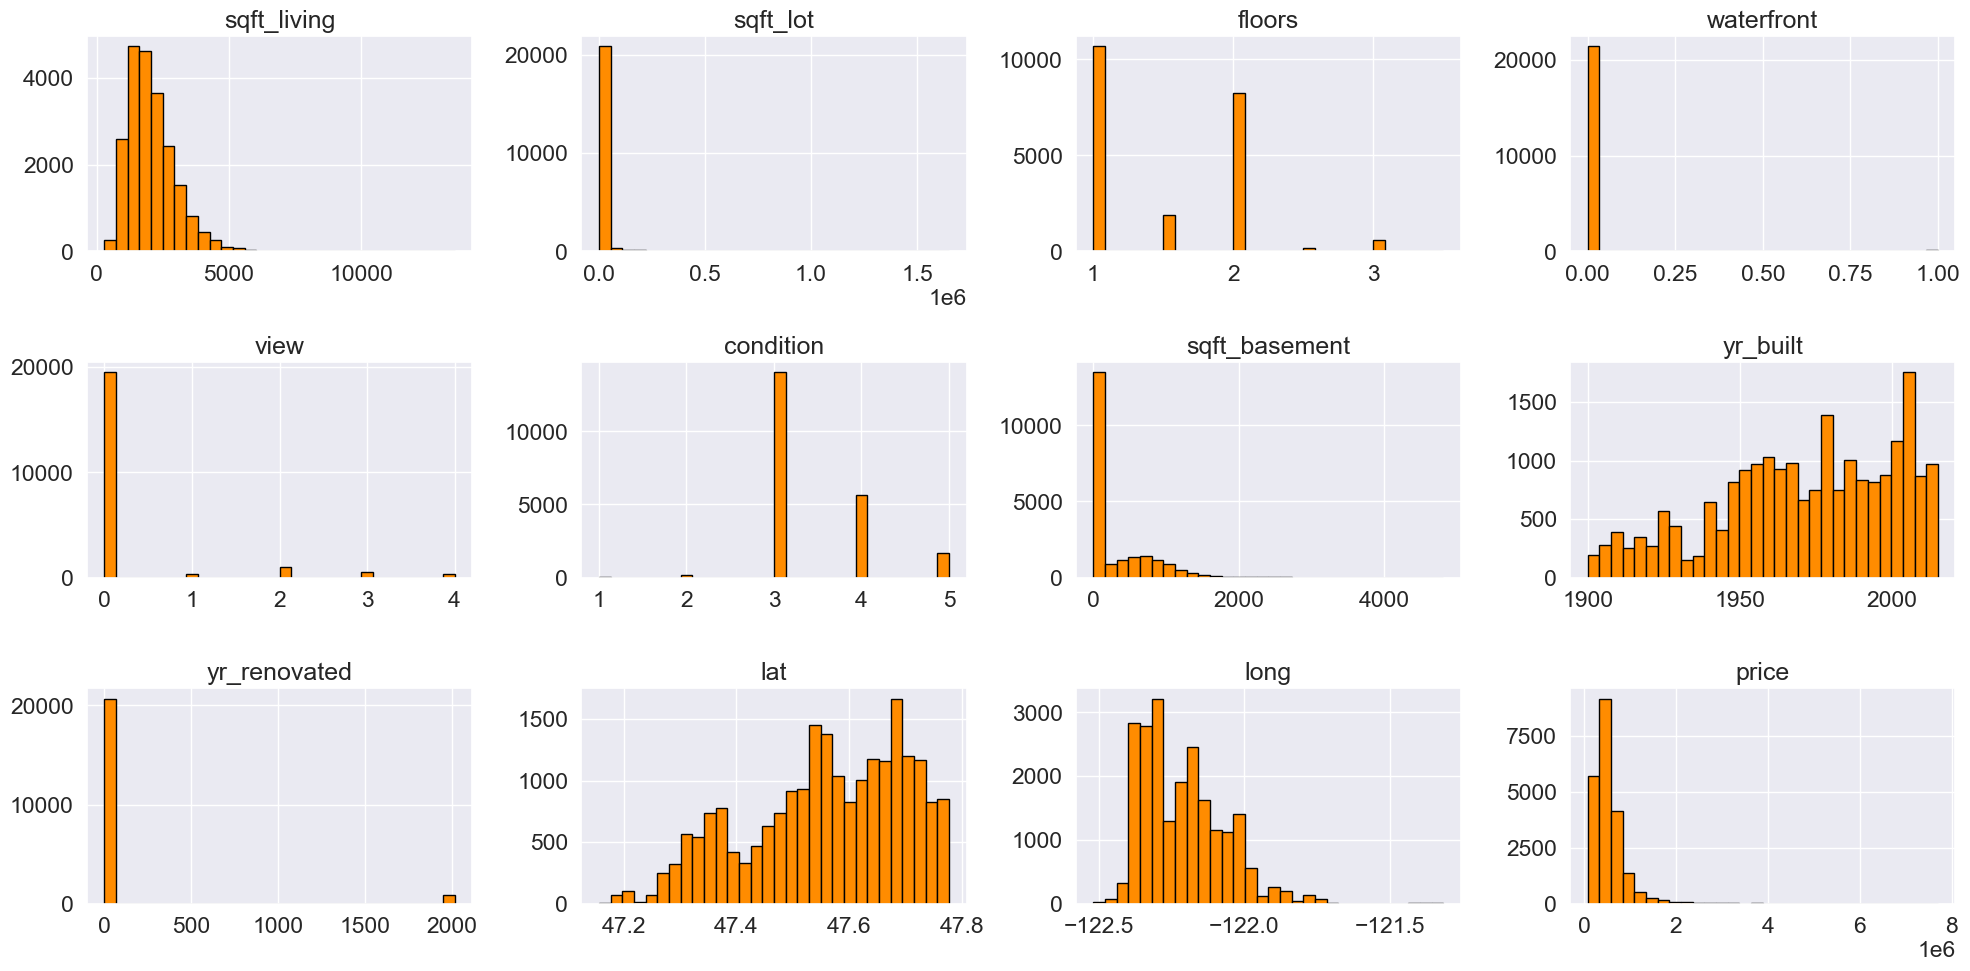

In [886]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

### Normalization with Log Transform

In [887]:
X_train_log = np.log1p(X_train) 
X_test_log = np.log1p(X_test)

/Users/lukaskreibig/Documents/ironhack/IronKaggle/.venv/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [888]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [889]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.7997
RMSE =  170069.5841
MAE =  91501.4616


### Actual vs Predicted Values

In [ ]:
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()


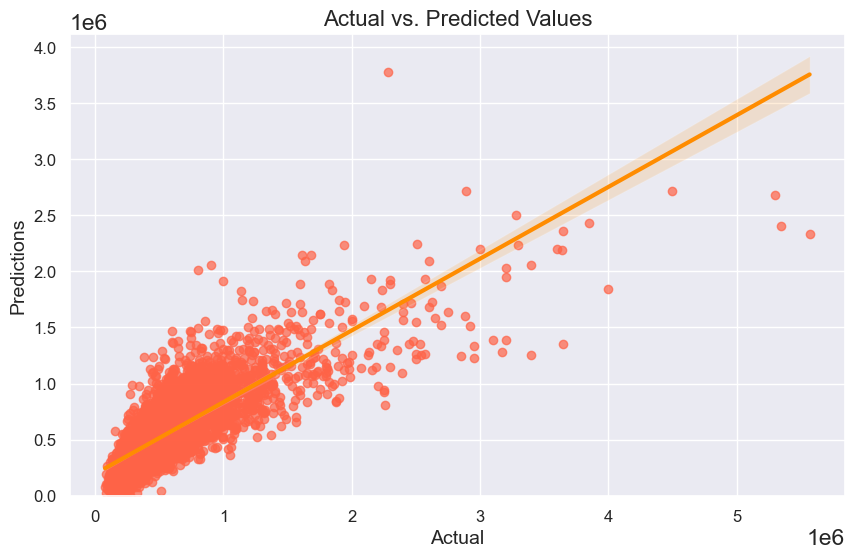

In [890]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()